<a href="https://colab.research.google.com/github/lmoroney/dlaicourse/blob/master/Course%202%20-%20Part%208%20-%20Lesson%202%20-%20Notebook%20(RockPaperScissors).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2019 The TensorFlow Authors.

In [0]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [1]:
# !wget --no-check-certificate \
#     https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip \
#     -O /tmp/rps.zip
  
# !wget --no-check-certificate \
#     https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip \
#     -O /tmp/rps-test-set.zip

In [4]:
import os
import zipfile

# local_zip = '/tmp/rps.zip'
# zip_ref = zipfile.ZipFile(local_zip, 'r')
# zip_ref.extractall('/tmp/')
# zip_ref.close()

# local_zip = '/tmp/rps-test-set.zip'
# zip_ref = zipfile.ZipFile(local_zip, 'r')
# zip_ref.extractall('/tmp/')
# zip_ref.close()

In [8]:
rock_dir = os.path.join('/home/mazz/Desktop/github/tmp/rps/rock')
paper_dir = os.path.join('/home/mazz/Desktop/github/tmp/rps/paper')
scissors_dir = os.path.join('/home/mazz/Desktop/github/tmp/rps/scissors')

print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training scissors images:', len(os.listdir(scissors_dir)))

rock_files = os.listdir(rock_dir)
print(rock_files[:10])

paper_files = os.listdir(paper_dir)
print(paper_files[:10])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:10])

total training rock images: 840
total training paper images: 840
total training scissors images: 840
['rock03-114.png', 'rock04-067.png', 'rock05ck01-001.png', 'rock04-072.png', 'rock06ck02-096.png', 'rock01-005.png', 'rock06ck02-022.png', 'rock02-096.png', 'rock06ck02-020.png', 'rock04-089.png']
['paper03-014.png', 'paper04-091.png', 'paper02-021.png', 'paper03-096.png', 'paper03-011.png', 'paper04-055.png', 'paper07-005.png', 'paper07-101.png', 'paper01-107.png', 'paper04-105.png']
['scissors03-026.png', 'scissors01-094.png', 'scissors03-027.png', 'testscissors03-062.png', 'scissors01-056.png', 'scissors02-035.png', 'scissors04-109.png', 'scissors02-109.png', 'scissors01-042.png', 'testscissors01-099.png']


In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [10]:
pic_index = 2

In [11]:
next_rock = [os.path.join(rock_dir,fname) for fname in rock_files[0:pic_index] ]
next_paper = [os.path.join(paper_dir,fname) for fname in paper_files[0:pic_index] ]
next_scissors = [os.path.join(scissors_dir,fname) for fname in scissors_files[0:pic_index] ]

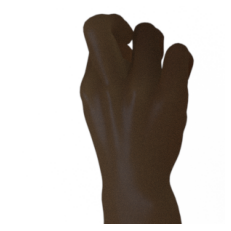

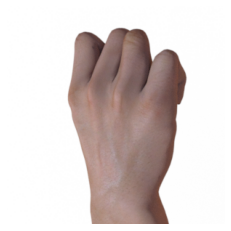

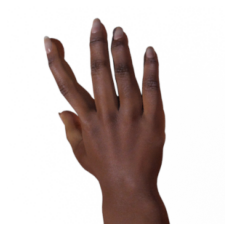

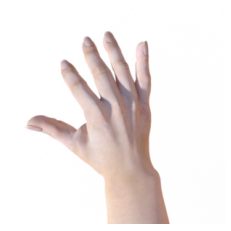

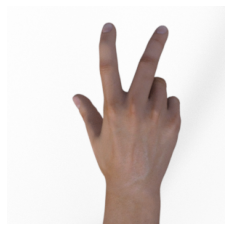

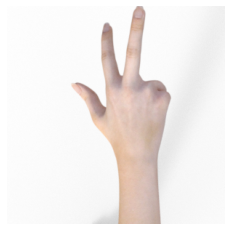

In [12]:
for i, img_path in enumerate(next_rock+next_paper+next_scissors):
  #print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [15]:
import tensorflow as tf
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator


In [16]:
TRAINING_DIR = "/home/mazz/Desktop/github/tmp/rps/"


In [18]:
training_datagen = ImageDataGenerator(
      rescale = 1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')


train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

Found 2520 images belonging to 3 classes.


In [20]:

VALIDATION_DIR = "/home/mazz/Desktop/github/tmp/rps-test-set/"
validation_datagen = ImageDataGenerator(rescale = 1./255)


validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)


Found 372 images belonging to 3 classes.


In [21]:

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [22]:


model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [23]:

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])


In [24]:

history = model.fit(train_generator, epochs=5, steps_per_epoch=20, validation_data = validation_generator, verbose = 1, validation_steps=3)

model.save("rps.h5")

Epoch 1/5
20/20 [==============================] - 158s 8s/step - loss: 1.4075 - accuracy: 0.3367 - val_loss: 1.1046 - val_accuracy: 0.3333
Epoch 2/5
20/20 [==============================] - 200s 10s/step - loss: 1.1117 - accuracy: 0.4159 - val_loss: 0.9349 - val_accuracy: 0.5941
Epoch 3/5
20/20 [==============================] - 240s 12s/step - loss: 1.0818 - accuracy: 0.4888 - val_loss: 0.8633 - val_accuracy: 0.6129
Epoch 4/5
20/20 [==============================] - 202s 10s/step - loss: 0.9162 - accuracy: 0.5901 - val_loss: 0.5824 - val_accuracy: 0.6532
Epoch 5/5
20/20 [==============================] - 201s 10s/step - loss: 0.7205 - accuracy: 0.6839 - val_loss: 0.3451 - val_accuracy: 0.9812


In [13]:
# %matplotlib inline

# import matplotlib.pyplot as plt
# import matplotlib.image as mpimg

# pic_index = 2

# next_rock = [os.path.join(rock_dir, fname) 
#                 for fname in rock_files[pic_index-2:pic_index]]
# next_paper = [os.path.join(paper_dir, fname) 
#                 for fname in paper_files[pic_index-2:pic_index]]
# next_scissors = [os.path.join(scissors_dir, fname) 
#                 for fname in scissors_files[pic_index-2:pic_index]]

# for i, img_path in enumerate(next_rock+next_paper+next_scissors):
#   #print(img_path)
#   img = mpimg.imread(img_path)
#   plt.imshow(img)
#   plt.axis('Off')
#   plt.show()

**Note:** Resize images with data generators to 150 x 150 (from 300 x 300) because that's what you want to input to the model.

In [7]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = "/home/mazz/Desktop/github/tmp/rps/"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "/home/mazz/Desktop/github/tmp/rps-test-set/"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])


model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(train_generator, epochs=25, steps_per_epoch=20, validation_data = validation_generator, verbose = 1, validation_steps=3)

model.save("rps.h5")


Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_______________________________________

KeyboardInterrupt: 

**Note:** The high training and validation accuracy shows that this dataset is highly specialized for this lesson and isn't reflective of real world scenarios. 

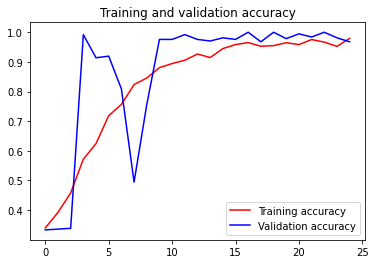

<Figure size 432x288 with 0 Axes>

In [0]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

**Pro tip:** If the following cell doesn't work in Safari, run the notebook in Chrome.

In [0]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

Saving paper2.png to paper2 (1).png
Saving rock-hires2.png to rock-hires2.png
Saving scissors-hires2.png to scissors-hires2.png
paper2.png
[[1. 0. 0.]]
rock-hires2.png
[[0. 1. 0.]]
scissors-hires2.png
[[0. 0. 1.]]
